In [1]:
import scanpy as sc
import os
import pandas as pd
from matplotlib import rcParams
os.chdir('/home/gaojie/workspace/Mida_collab/')
rcParams["figure.figsize"] = (4, 4)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
combined = sc.read_h5ad('Multi-omics_intergration/output/adata_combined.h5ad')
combined.shape

(46743, 418953)

In [3]:
### after label_transfer
prediction = pd.read_csv('Multi-omics_intergration/output/emb_glue_prediction.csv',index_col=0,header=0)
prediction.head()

,identity,cluster,dataset,celltype_cellpred
GW11_C_AAACCCAAGCCGATTT-1,Nascent_ExN,empty,RNA,Nascent_ExN
GW11_C_AAACCCAAGGTTGTTC-1,vRG,empty,RNA,vRG
GW11_C_AAACCCAAGTGTGTTC-1,vRG,empty,RNA,vRG
GW11_C_AAACCCAGTCCCGTGA-1,IPC2,empty,RNA,IPC2
GW11_C_AAACCCAGTTTGAAAG-1,vRG,empty,RNA,vRG


In [4]:
combined.obs['predicted_celltype'] = prediction.loc[combined.obs_names,'celltype_cellpred']
combined = combined[~combined.obs['predicted_celltype'].isin(['Others','Others_to_remove','Unknown']),:] ###remove irrelevant clusters
combined.shape

(44377, 418953)

In [5]:
colors = ['#FFED6F','#FF7F00','#B3DE69','#FCCDE5','#FB8072',
             '#6A3D9A','#1F78B4','#FDB462',
             '#33A02C']
celltypes = ['vRG','oRG','IPC1','IPC2', 'Nascent_ExN',
                    'L6B','CFuPN','IN',
                    'Microglia_OPC']

In [6]:
###customize colors
combined.obs['predicted_celltype'] = pd.Categorical(combined.obs['predicted_celltype'],categories=celltypes,ordered=True)
combined.obs['region'] = combined.obs['region'].apply(lambda x: {'Sulcus':'Sulcus','Adjacent':'Adjacent','Distant':'Distal'}[x])
combined.obs['region'] = pd.Categorical(combined.obs['region'],categories=['Sulcus','Adjacent','Distal'],ordered=True)
combined.uns['region_colors'] = ['#1e807a',  '#f5d731','#d92523']
combined.uns['predicted_celltype_colors'] = colors

/tmp/ipykernel_3087320/3306526307.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  combined.obs['predicted_celltype'] = pd.Categorical(combined.obs['predicted_celltype'],categories=celltypes,ordered=True)


In [7]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)

/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


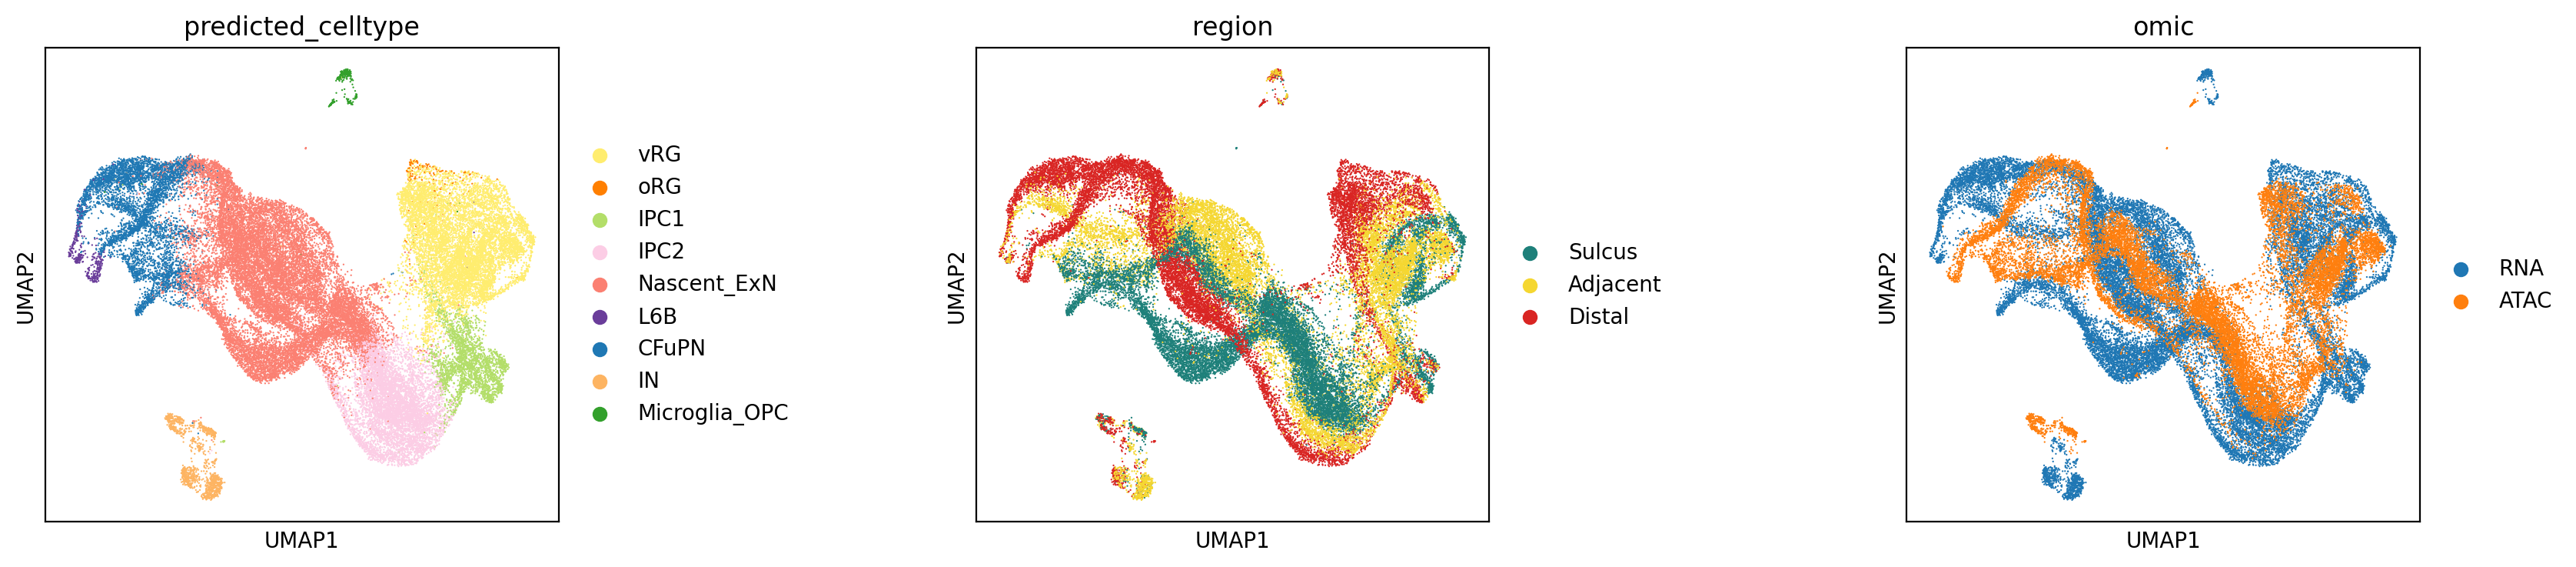

In [8]:
sc.pl.umap(combined, color=['predicted_celltype','region','omic'], wspace=0.65)